# Importing all the necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import string
import re

# Reading csv files:

Read individual CSV files into DataFrames

In [3]:
altcoin_df = pd.read_csv('./Assinment_1 csv files/altcoin.csv')
appl_df = pd.read_csv('./Assinment_1 csv files/APPL.csv')
bitcoin_df = pd.read_csv('./Assinment_1 csv files/bitcoin.csv')
coindesk_df = pd.read_csv('./Assinment_1 csv files/coindesk.csv')
cryptocurrency_df = pd.read_csv('./Assinment_1 csv files/Cryptocurrency.csv')
gold_df = pd.read_csv('./Assinment_1 csv files/Gold.csv')
goog_df = pd.read_csv('./Assinment_1 csv files/GOOG.csv')
yhoo_df = pd.read_csv('./Assinment_1 csv files/YHOO.csv')

In [16]:
appl_df.tail()


,Datetime,Tweet Id,Text,URL,User
3176,2023-03-05 00:24:38+00:00,1632175250564845570,@appl_morning1 おはようございます🌿,https://twitter.com/0622Tigers/status/16321752...,https://twitter.com/0622Tigers
3177,2023-03-05 00:18:04+00:00,1632173596956311555,あかん、言動が気持ち悪い……\n #仮面ライダーギーツ,https://twitter.com/youyou_appl/status/1632173...,https://twitter.com/youyou_appl
3178,2023-03-05 00:17:13+00:00,1632173384141541376,でたな厄介ファン #仮面ライダーギーツ,https://twitter.com/youyou_appl/status/1632173...,https://twitter.com/youyou_appl
3179,2023-03-05 00:16:00+00:00,1632173075486879744,#おはようトレイン \nおはよう🍓\n今日は近場に出かける https://t.co/Mff...,https://twitter.com/appl_morning1/status/16321...,https://twitter.com/appl_morning1
3180,2023-03-05 00:03:31+00:00,1632169937350303744,Apple’s Approval Process Delays Uniswap’s Mobi...,https://twitter.com/ZhotCrypto/status/16321699...,https://twitter.com/ZhotCrypto


# Concatenating all the csv files to one

In [4]:
# List of dataframes to be concatenated
data_frames = [altcoin_df, appl_df, bitcoin_df, coindesk_df, cryptocurrency_df, gold_df, goog_df, yhoo_df]

# Check if each dataframe contains the 'Text' column
for idx, df in enumerate(data_frames):
    if 'Text' not in df.columns:
        raise ValueError(f"Error: 'Text' column not found in DataFrame at index {idx}.")
        # or you can use 'print' instead of 'raise' if you want to continue execution with a warning

# Concatenate the dataframes along rows, ignoring the original index
tweeter_combined_df = pd.concat(data_frames, ignore_index=True)
print(tweeter_combined_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36831 entries, 0 to 36830
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  36831 non-null  object
 1   Tweet Id  36831 non-null  int64 
 2   Text      36831 non-null  object
 3   URL       36831 non-null  object
 4   User      36831 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.4+ MB
None


# displaying top 5 rows of the combined dataset

In [5]:
tweeter_combined_df.head()

,Datetime,Tweet Id,Text,URL,User
0,2023-03-10 23:58:29+00:00,1634342993812414464,#Ethereum price update: \n\n#ETH $1430.93 USD\...,https://twitter.com/0xEthereumYoda/status/1634...,https://twitter.com/0xEthereumYoda
1,2023-03-10 23:58:19+00:00,1634342954755313664,"@Altcoin_Gems_ @Lotto_Arb Wow, this is Fstasti...",https://twitter.com/missufee1410213/status/163...,https://twitter.com/missufee1410213
2,2023-03-10 23:57:48+00:00,1634342825465708545,@Altcoin_Gold Missing $DSLA,https://twitter.com/migueldiz0n/status/1634342...,https://twitter.com/migueldiz0n
3,2023-03-10 23:57:48+00:00,1634342821837811712,@Altcoin_Gems_ @Lotto_Arb Wow interesting,https://twitter.com/Hanitzy_/status/1634342821...,https://twitter.com/Hanitzy_
4,2023-03-10 23:57:40+00:00,1634342788518248448,@TreatsBot $paw #paw #altcoin #memecoins https...,https://twitter.com/RifainAP/status/1634342788...,https://twitter.com/RifainAP


In [15]:
tweeter_combined_df.tail()

,Datetime,Tweet Id,Text,URL,User
36826,2023-03-05 00:14:38+00:00,1632172734581972992,Khosi did what 😂😂😂😤😤😤😤 yhoo ha.a Nana is dange...,https://twitter.com/MzuzwanaYamkela/status/163...,https://twitter.com/MzuzwanaYamkela
36827,2023-03-05 00:13:20+00:00,1632172404909789184,Yhoo Nana what is your business with Thabang y...,https://twitter.com/MzuzwanaYamkela/status/163...,https://twitter.com/MzuzwanaYamkela
36828,2023-03-05 00:07:45+00:00,1632170999515869184,Yes yhoo,https://twitter.com/Lissssativa/status/1632170...,https://twitter.com/Lissssativa
36829,2023-03-05 00:03:14+00:00,1632169864218435585,Yhoo I was about to go to bed 😭😭 #BBTitans,https://twitter.com/its_sommy/status/163216986...,https://twitter.com/its_sommy
36830,2023-03-05 00:00:48+00:00,1632169253079072768,@NguboAyimbathwa @ChristoThurston @ThuliMadons...,https://twitter.com/Bright_Afrika/status/16321...,https://twitter.com/Bright_Afrika


# Save the concatenated DataFrame to a CSV file


In [18]:
tweeter_combined_df.to_csv('Combined_Tweeter.csv', index=False)


In [21]:
tweeter_combined_df.head()

,Datetime,Tweet Id,Text,URL,User
0,2023-03-10 23:58:29+00:00,1634342993812414464,#Ethereum price update: \n\n#ETH $1430.93 USD\...,https://twitter.com/0xEthereumYoda/status/1634...,https://twitter.com/0xEthereumYoda
1,2023-03-10 23:58:19+00:00,1634342954755313664,"@Altcoin_Gems_ @Lotto_Arb Wow, this is Fstasti...",https://twitter.com/missufee1410213/status/163...,https://twitter.com/missufee1410213
2,2023-03-10 23:57:48+00:00,1634342825465708545,@Altcoin_Gold Missing $DSLA,https://twitter.com/migueldiz0n/status/1634342...,https://twitter.com/migueldiz0n
3,2023-03-10 23:57:48+00:00,1634342821837811712,@Altcoin_Gems_ @Lotto_Arb Wow interesting,https://twitter.com/Hanitzy_/status/1634342821...,https://twitter.com/Hanitzy_
4,2023-03-10 23:57:40+00:00,1634342788518248448,@TreatsBot $paw #paw #altcoin #memecoins https...,https://twitter.com/RifainAP/status/1634342788...,https://twitter.com/RifainAP


# Checking the rows, columns and size of dataset

In [22]:
rows, columns = df.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

# Size of DataFrame in memory (in bytes)
size_bytes = df.memory_usage(deep=True).sum()
print(f"Size of DataFrame: {size_bytes} bytes")



Number of rows: 3644, Number of columns: 5
Size of DataFrame: 2005153 bytes


In [23]:
tweeter_combined_df.head()

,Datetime,Tweet Id,Text,URL,User
0,2023-03-10 23:58:29+00:00,1634342993812414464,#Ethereum price update: \n\n#ETH $1430.93 USD\...,https://twitter.com/0xEthereumYoda/status/1634...,https://twitter.com/0xEthereumYoda
1,2023-03-10 23:58:19+00:00,1634342954755313664,"@Altcoin_Gems_ @Lotto_Arb Wow, this is Fstasti...",https://twitter.com/missufee1410213/status/163...,https://twitter.com/missufee1410213
2,2023-03-10 23:57:48+00:00,1634342825465708545,@Altcoin_Gold Missing $DSLA,https://twitter.com/migueldiz0n/status/1634342...,https://twitter.com/migueldiz0n
3,2023-03-10 23:57:48+00:00,1634342821837811712,@Altcoin_Gems_ @Lotto_Arb Wow interesting,https://twitter.com/Hanitzy_/status/1634342821...,https://twitter.com/Hanitzy_
4,2023-03-10 23:57:40+00:00,1634342788518248448,@TreatsBot $paw #paw #altcoin #memecoins https...,https://twitter.com/RifainAP/status/1634342788...,https://twitter.com/RifainAP


# Cleaning up the column names in the combined DataFrame by removing any leading or trailing whitespaces. 

In [24]:
tweeter_combined_df.columns = tweeter_combined_df.columns.str.strip()  
# Strip leading/trailing whitespaces from column names
tweeter_combined_df.head()

,Datetime,Tweet Id,Text,URL,User
0,2023-03-10 23:58:29+00:00,1634342993812414464,#Ethereum price update: \n\n#ETH $1430.93 USD\...,https://twitter.com/0xEthereumYoda/status/1634...,https://twitter.com/0xEthereumYoda
1,2023-03-10 23:58:19+00:00,1634342954755313664,"@Altcoin_Gems_ @Lotto_Arb Wow, this is Fstasti...",https://twitter.com/missufee1410213/status/163...,https://twitter.com/missufee1410213
2,2023-03-10 23:57:48+00:00,1634342825465708545,@Altcoin_Gold Missing $DSLA,https://twitter.com/migueldiz0n/status/1634342...,https://twitter.com/migueldiz0n
3,2023-03-10 23:57:48+00:00,1634342821837811712,@Altcoin_Gems_ @Lotto_Arb Wow interesting,https://twitter.com/Hanitzy_/status/1634342821...,https://twitter.com/Hanitzy_
4,2023-03-10 23:57:40+00:00,1634342788518248448,@TreatsBot $paw #paw #altcoin #memecoins https...,https://twitter.com/RifainAP/status/1634342788...,https://twitter.com/RifainAP


# Convert Datatime to Datetime format

In [25]:
tweeter_combined_df['Datetime'] = pd.to_datetime(tweeter_combined_df.loc[:,'Datetime'])

# Checking the size of the dataset

In [26]:
tweeter_combined_df.shape

(36831, 5)

In [27]:
tweeter_combined_df.size

184155

# Removing Duplicates values

In [28]:
tweeter_combined_df.drop_duplicates(inplace=True)

In [29]:
tweeter_combined_df.size

181855

In [30]:
print(tweeter_combined_df.columns)

Index(['Datetime', 'Tweet Id', 'Text', 'URL', 'User'], dtype='object')


In [31]:
tweeter_combined_df['Text'].head(5)

0    #Ethereum price update: \n\n#ETH $1430.93 USD\...
1    @Altcoin_Gems_ @Lotto_Arb Wow, this is Fstasti...
2                          @Altcoin_Gold Missing $DSLA
3            @Altcoin_Gems_ @Lotto_Arb Wow interesting
4    @TreatsBot $paw #paw #altcoin #memecoins https...
Name: Text, dtype: object

# Removing punctuations

In [32]:
# Function to remove punctuation from text using translate method and special characters
def clean_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove special characters like '&lt;' and '&gt;'
    text = re.sub(r'&lt;|&gt;', '', text)
    return text

# Apply the clean_text function to the 'Text' column of the DataFrame
tweeter_combined_df['Text'] = tweeter_combined_df['Text'].apply(clean_text)

In [33]:
tweeter_combined_df.head(5)

,Datetime,Tweet Id,Text,URL,User
0,2023-03-10 23:58:29+00:00,1634342993812414464,Ethereum price update \n\nETH 143093 USD\nBitc...,https://twitter.com/0xEthereumYoda/status/1634...,https://twitter.com/0xEthereumYoda
1,2023-03-10 23:58:19+00:00,1634342954755313664,AltcoinGems LottoArb Wow this is Fstastic 🚀🚀,https://twitter.com/missufee1410213/status/163...,https://twitter.com/missufee1410213
2,2023-03-10 23:57:48+00:00,1634342825465708545,AltcoinGold Missing DSLA,https://twitter.com/migueldiz0n/status/1634342...,https://twitter.com/migueldiz0n
3,2023-03-10 23:57:48+00:00,1634342821837811712,AltcoinGems LottoArb Wow interesting,https://twitter.com/Hanitzy_/status/1634342821...,https://twitter.com/Hanitzy_
4,2023-03-10 23:57:40+00:00,1634342788518248448,TreatsBot paw paw altcoin memecoins httpstcohi...,https://twitter.com/RifainAP/status/1634342788...,https://twitter.com/RifainAP


### Text Cleaning (Removing Short words and Numbers)

In [34]:
# Remove single-character words and numerical digits from tweets
tweeter_combined_df['Text'] = tweeter_combined_df['Text'].apply(lambda x: ' '.join([word for word in x.split() if len(word) >= 2]))
tweeter_combined_df['Text'] = tweeter_combined_df['Text'].apply(lambda x: ''.join([char for char in x if not char.isdigit()]))
# Display the first few rows of the DataFrame after processing
tweeter_combined_df.head()

,Datetime,Tweet Id,Text,URL,User
0,2023-03-10 23:58:29+00:00,1634342993812414464,Ethereum price update ETH USD Bitcoin BTC Fo...,https://twitter.com/0xEthereumYoda/status/1634...,https://twitter.com/0xEthereumYoda
1,2023-03-10 23:58:19+00:00,1634342954755313664,AltcoinGems LottoArb Wow this is Fstastic 🚀🚀,https://twitter.com/missufee1410213/status/163...,https://twitter.com/missufee1410213
2,2023-03-10 23:57:48+00:00,1634342825465708545,AltcoinGold Missing DSLA,https://twitter.com/migueldiz0n/status/1634342...,https://twitter.com/migueldiz0n
3,2023-03-10 23:57:48+00:00,1634342821837811712,AltcoinGems LottoArb Wow interesting,https://twitter.com/Hanitzy_/status/1634342821...,https://twitter.com/Hanitzy_
4,2023-03-10 23:57:40+00:00,1634342788518248448,TreatsBot paw paw altcoin memecoins httpstcohi...,https://twitter.com/RifainAP/status/1634342788...,https://twitter.com/RifainAP


# Data Visualization

In [35]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: C:\Users\TravelMate\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


# Import necessary libraries for Visualization

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Analyzing the daily activity on Twitter, showing the number of tweets made each day over a certain period and visualizing this data in a line plot.

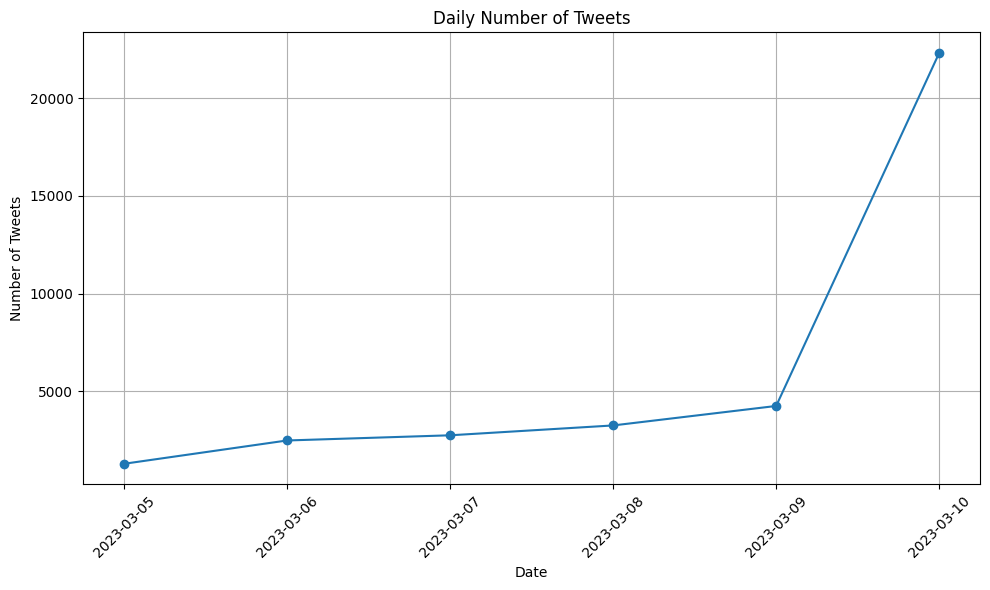

In [44]:
#converting 'Datetime' to 'date' format
tweeter_combined_df['Date'] = tweeter_combined_df['Datetime'].dt.date


daily_tweet_counts = tweeter_combined_df.groupby('Date').size()
daily_user_counts = tweeter_combined_df.groupby('Date')['User'].nunique()

# Plotting the daily number of tweets
plt.figure(figsize=(10, 6))
plt.plot(daily_tweet_counts.index, daily_tweet_counts.values, marker='o', linestyle='-')
plt.title('Daily Number of Tweets')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the daily number of users

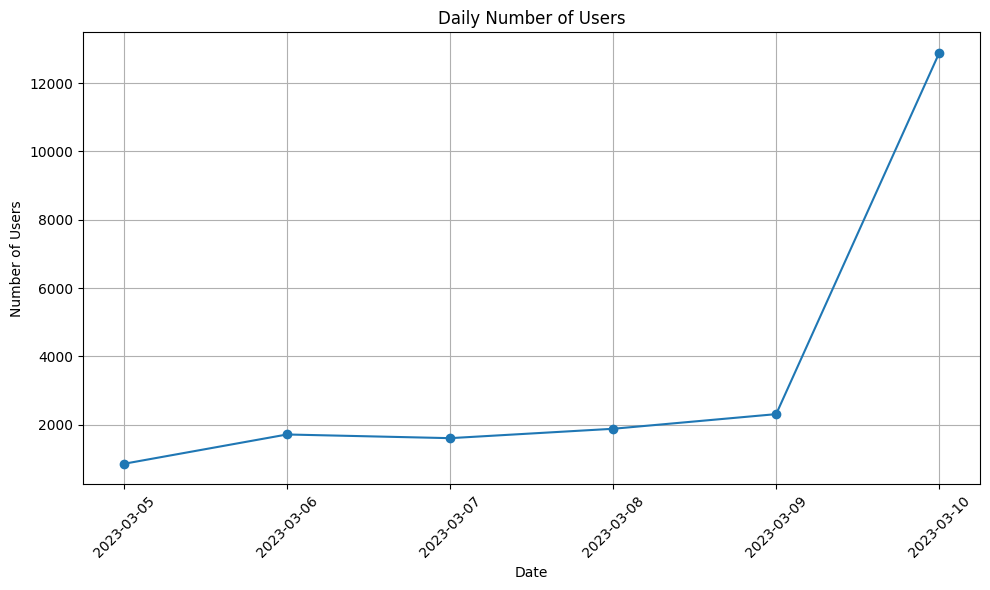

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(daily_user_counts.index, daily_user_counts.values, marker='o', linestyle='-')
plt.title('Daily Number of Users')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting wordcloud of most frequent words

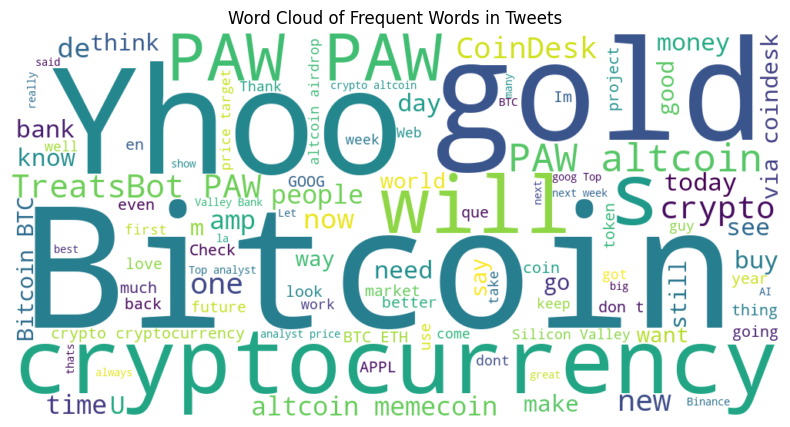

In [38]:
all_text = ' '.join(tweeter_combined_df['Text'].astype(str))

wordcloud = WordCloud(width=1000, height=500, max_words=100, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Words in Tweets')
plt.show()

# Keywords to analyze separately


In [46]:
keywords = ['Altcoin', 'Bitcoin', 'Coindesk', 'Cryptocurrency', 'Gold', 'APPL', 'GOOG', 'YHOO']

# Calculating the daily number of tweets for each keyword, and plots a separate line chart for each keyword showing the daily tweet counts.

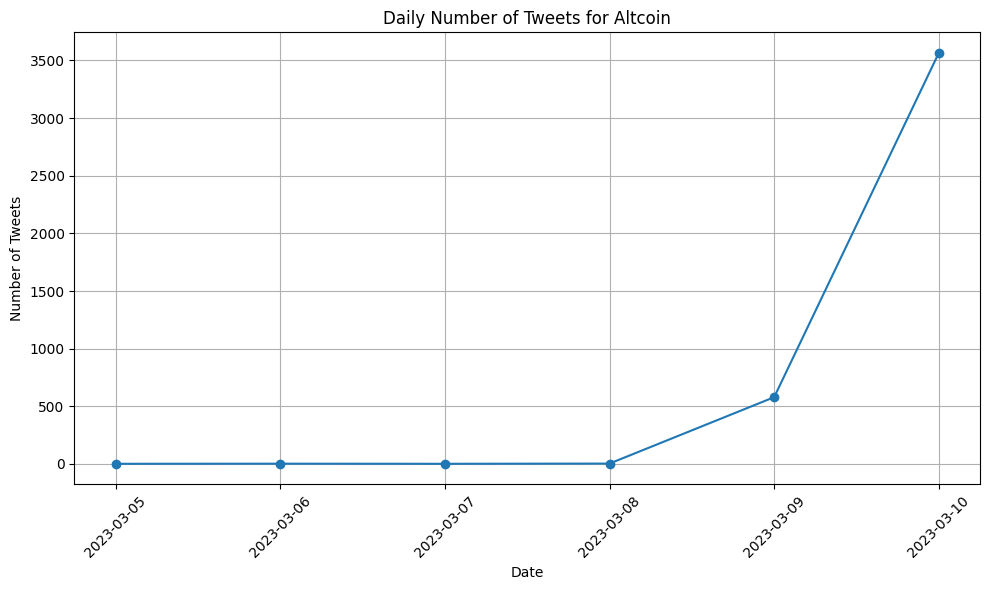

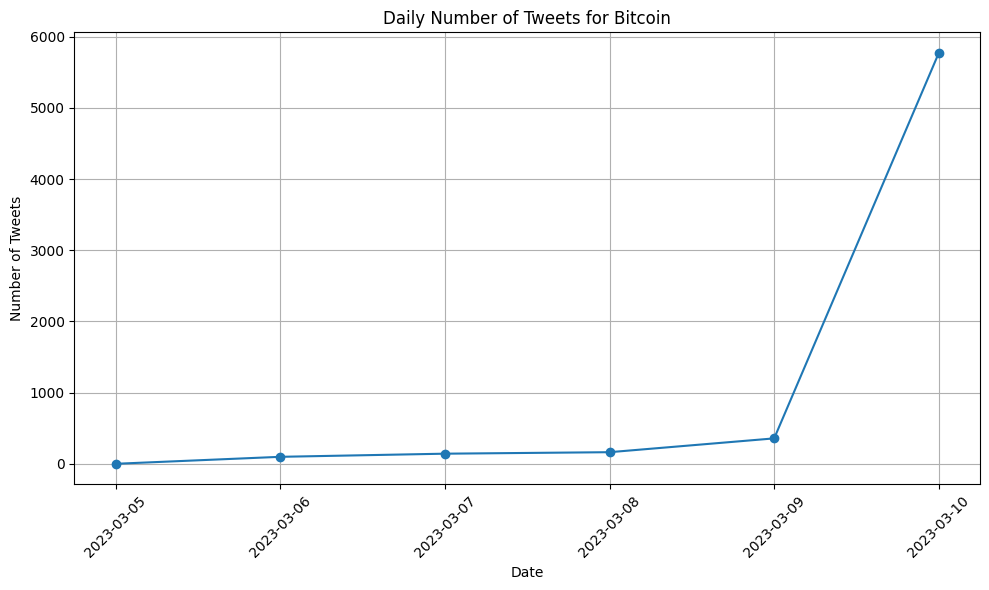

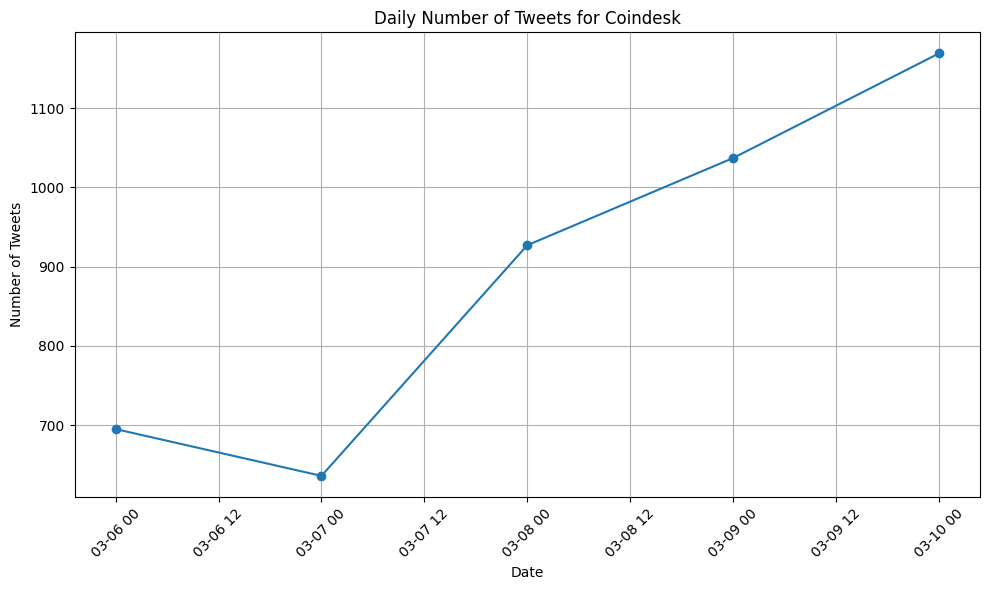

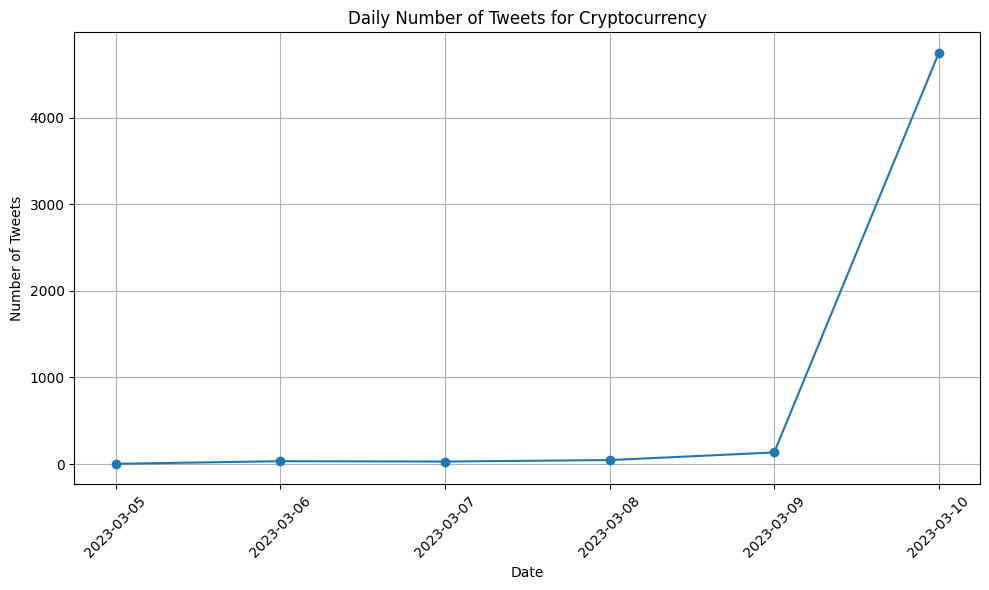

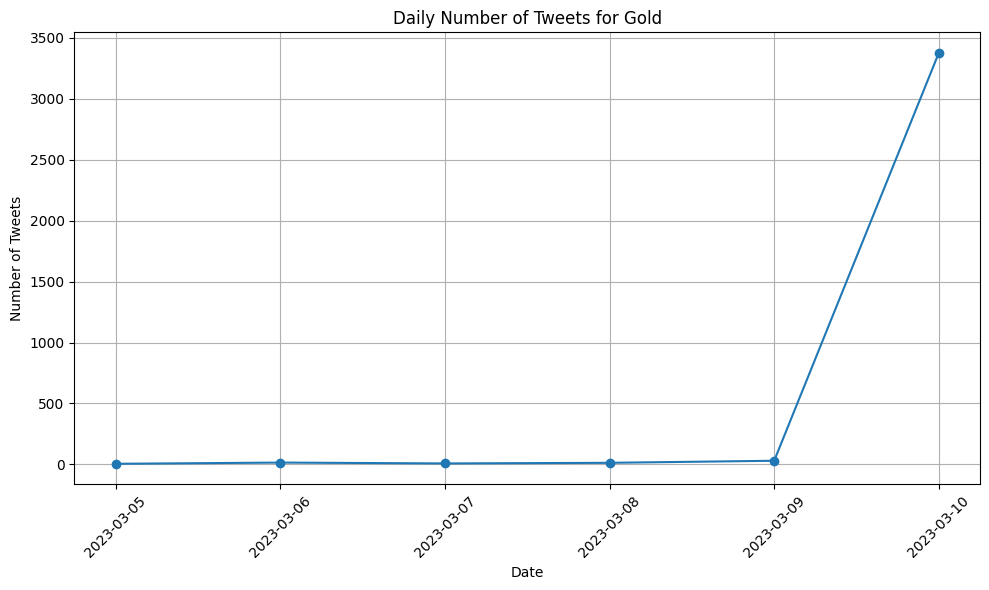

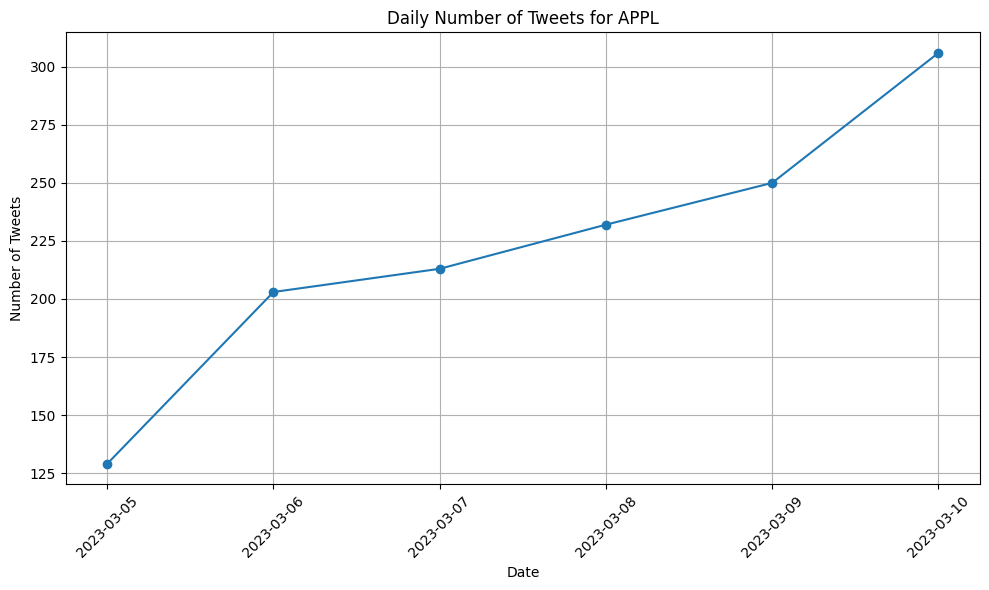

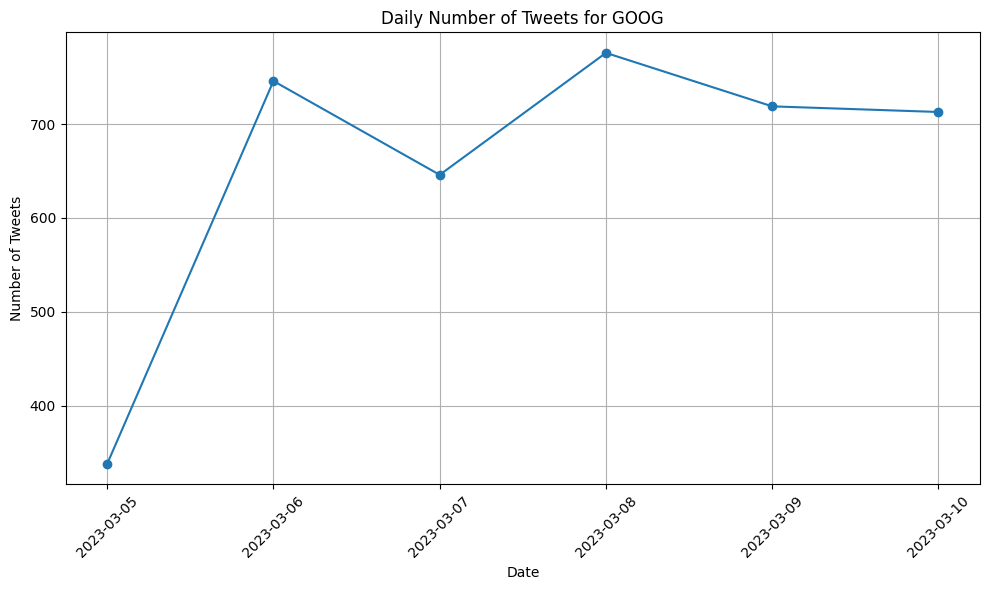

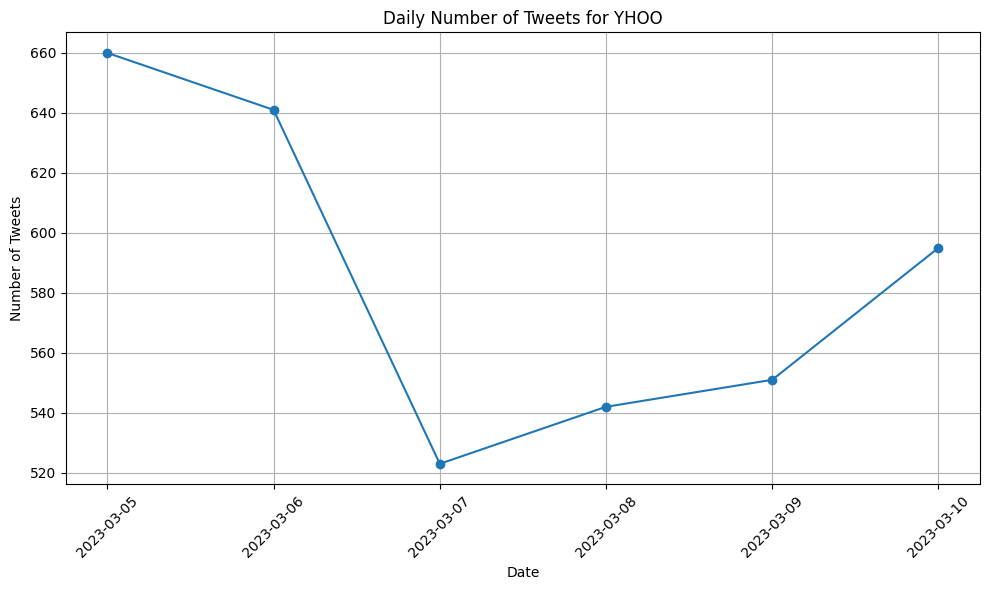

In [47]:
for keyword in keywords:
    keyword_data = tweeter_combined_df[tweeter_combined_df['Text'].str.contains(keyword, case=False)]
    daily_tweet_counts_keyword = keyword_data.groupby('Date').size()

    plt.figure(figsize=(10, 6))
    plt.plot(daily_tweet_counts_keyword.index, daily_tweet_counts_keyword.values, marker='o', linestyle='-')
    plt.title(f'Daily Number of Tweets for {keyword}')
    plt.xlabel('Date')
    plt.ylabel('Number of Tweets')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plotting daily number of users per keyword

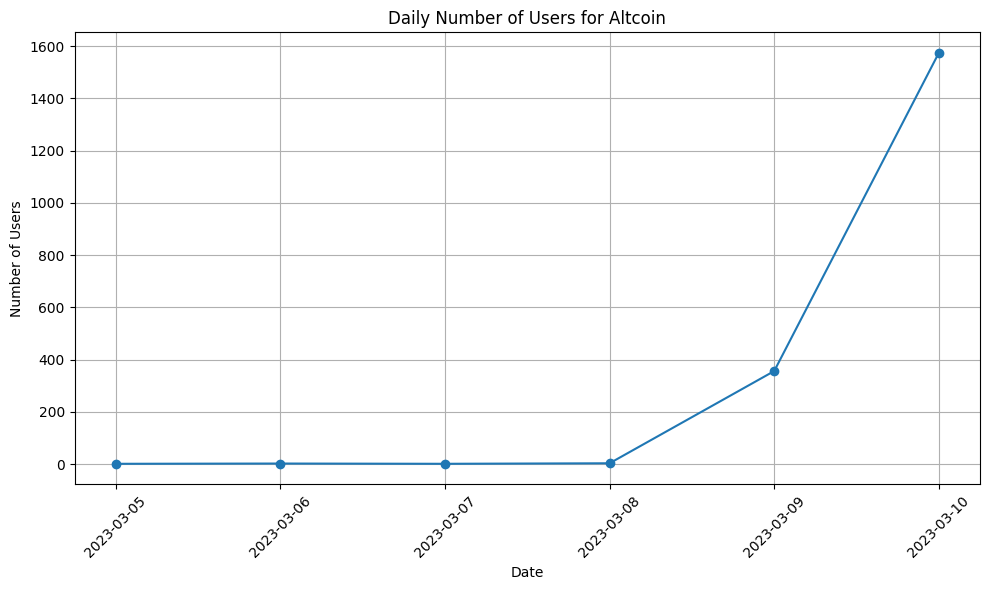

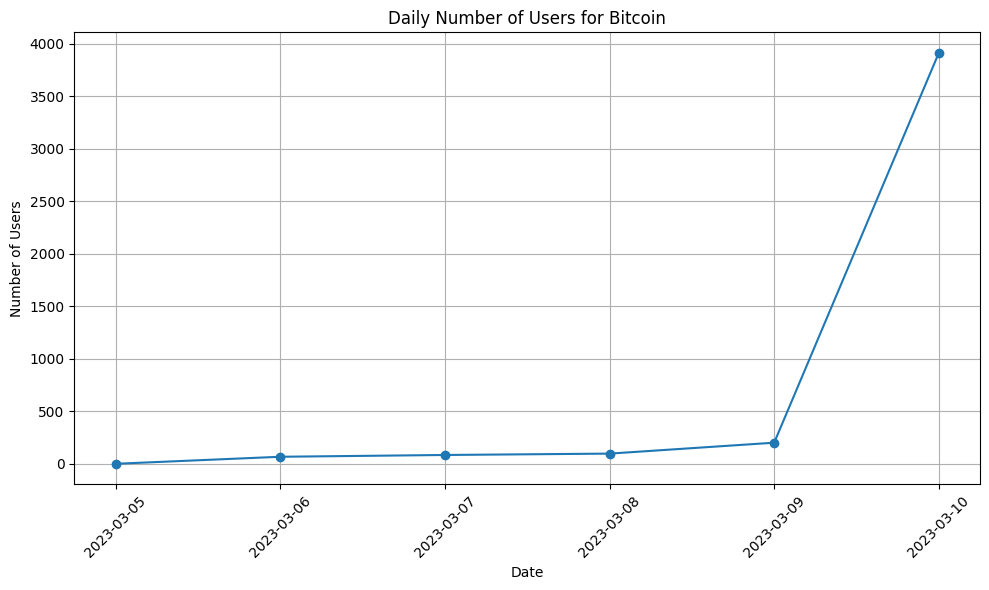

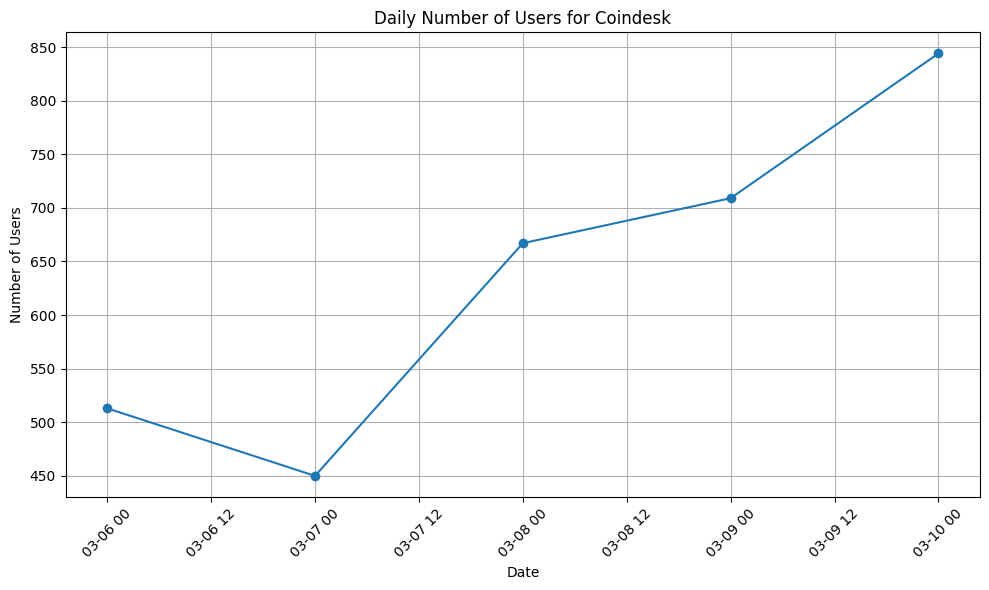

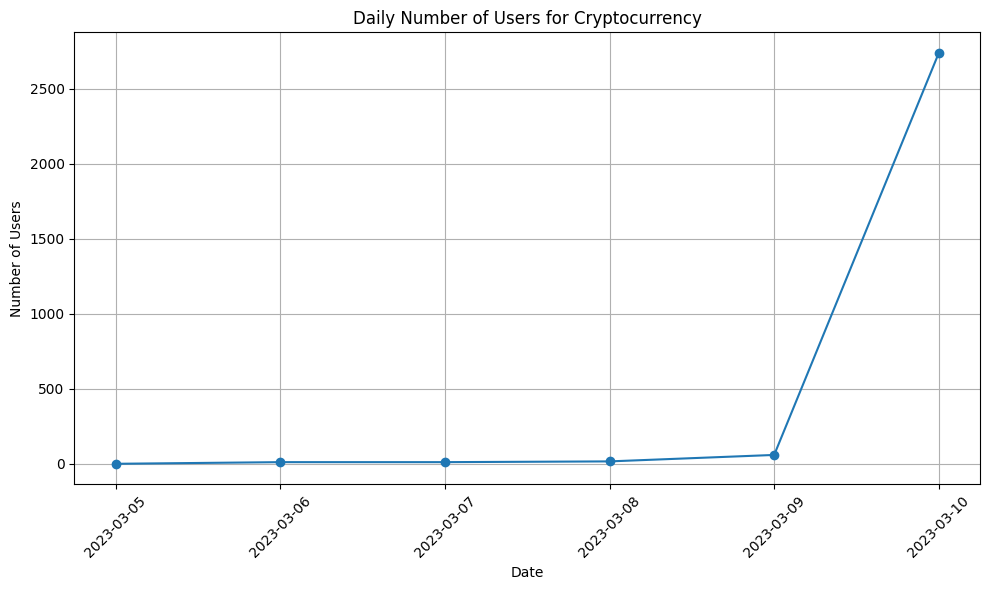

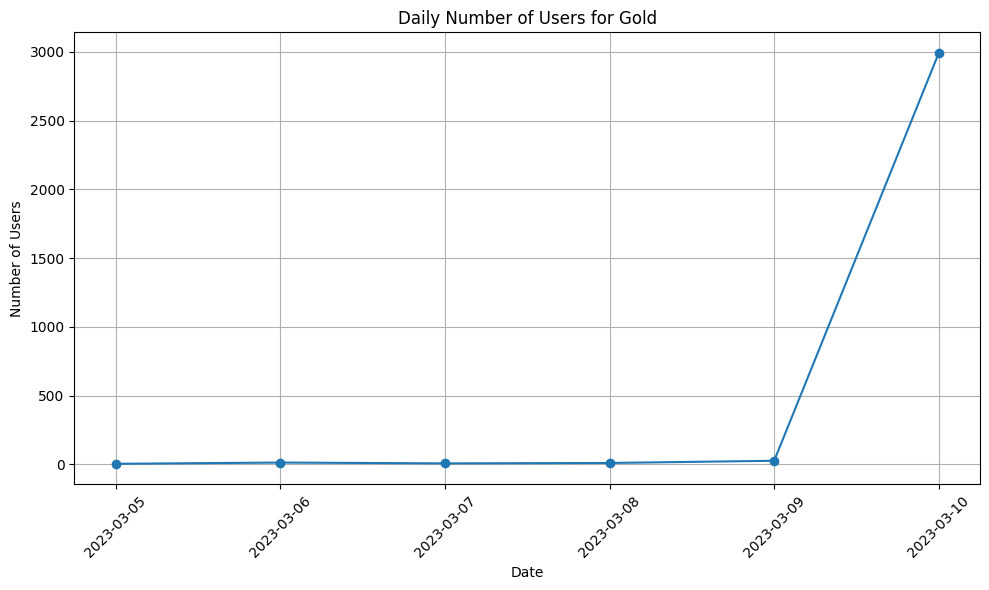

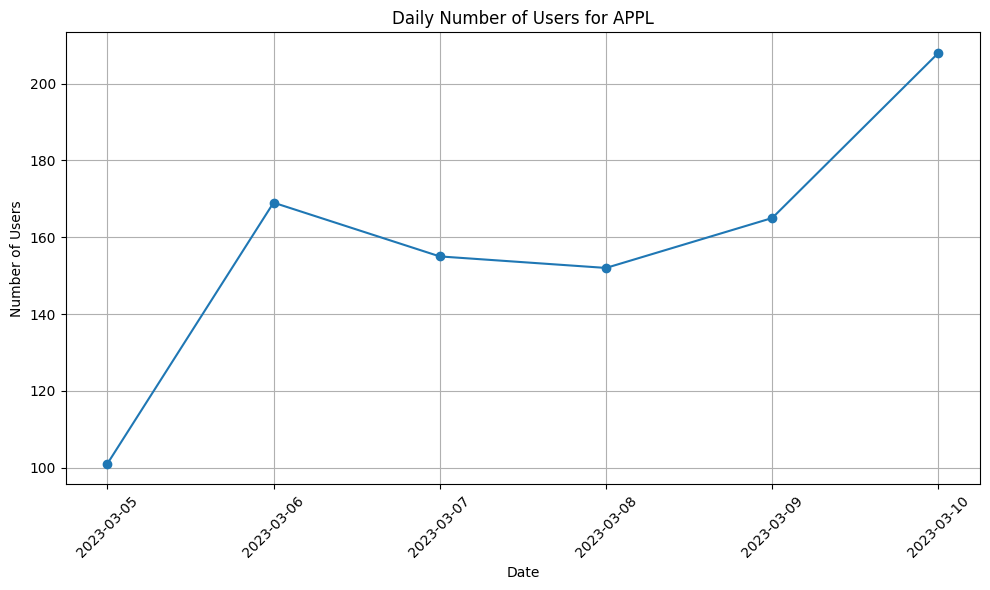

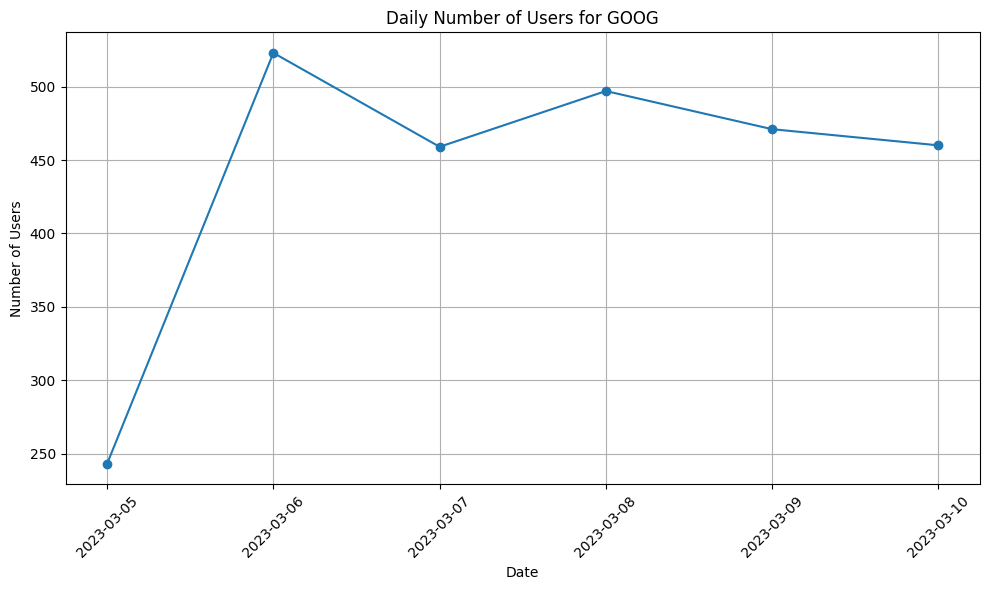

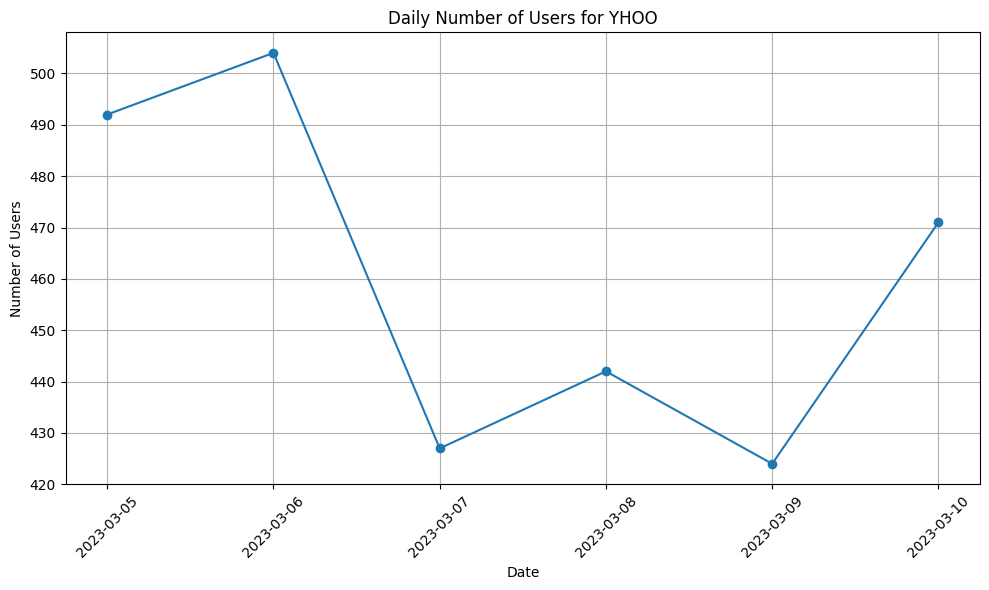

In [48]:
for keyword in keywords:
    keyword_data = tweeter_combined_df[tweeter_combined_df['Text'].str.contains(keyword, case=False)]
    daily_user_counts_keyword = keyword_data.groupby('Date')['User'].nunique()

    plt.figure(figsize=(10, 6))
    plt.plot(daily_user_counts_keyword.index, daily_user_counts_keyword.values, marker='o', linestyle='-')
    plt.title(f'Daily Number of Users for {keyword}')
    plt.xlabel('Date')
    plt.ylabel('Number of Users')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Creating subplots illustrating daily tweet counts and unique user counts for specific keywords extracted from Twitter data.

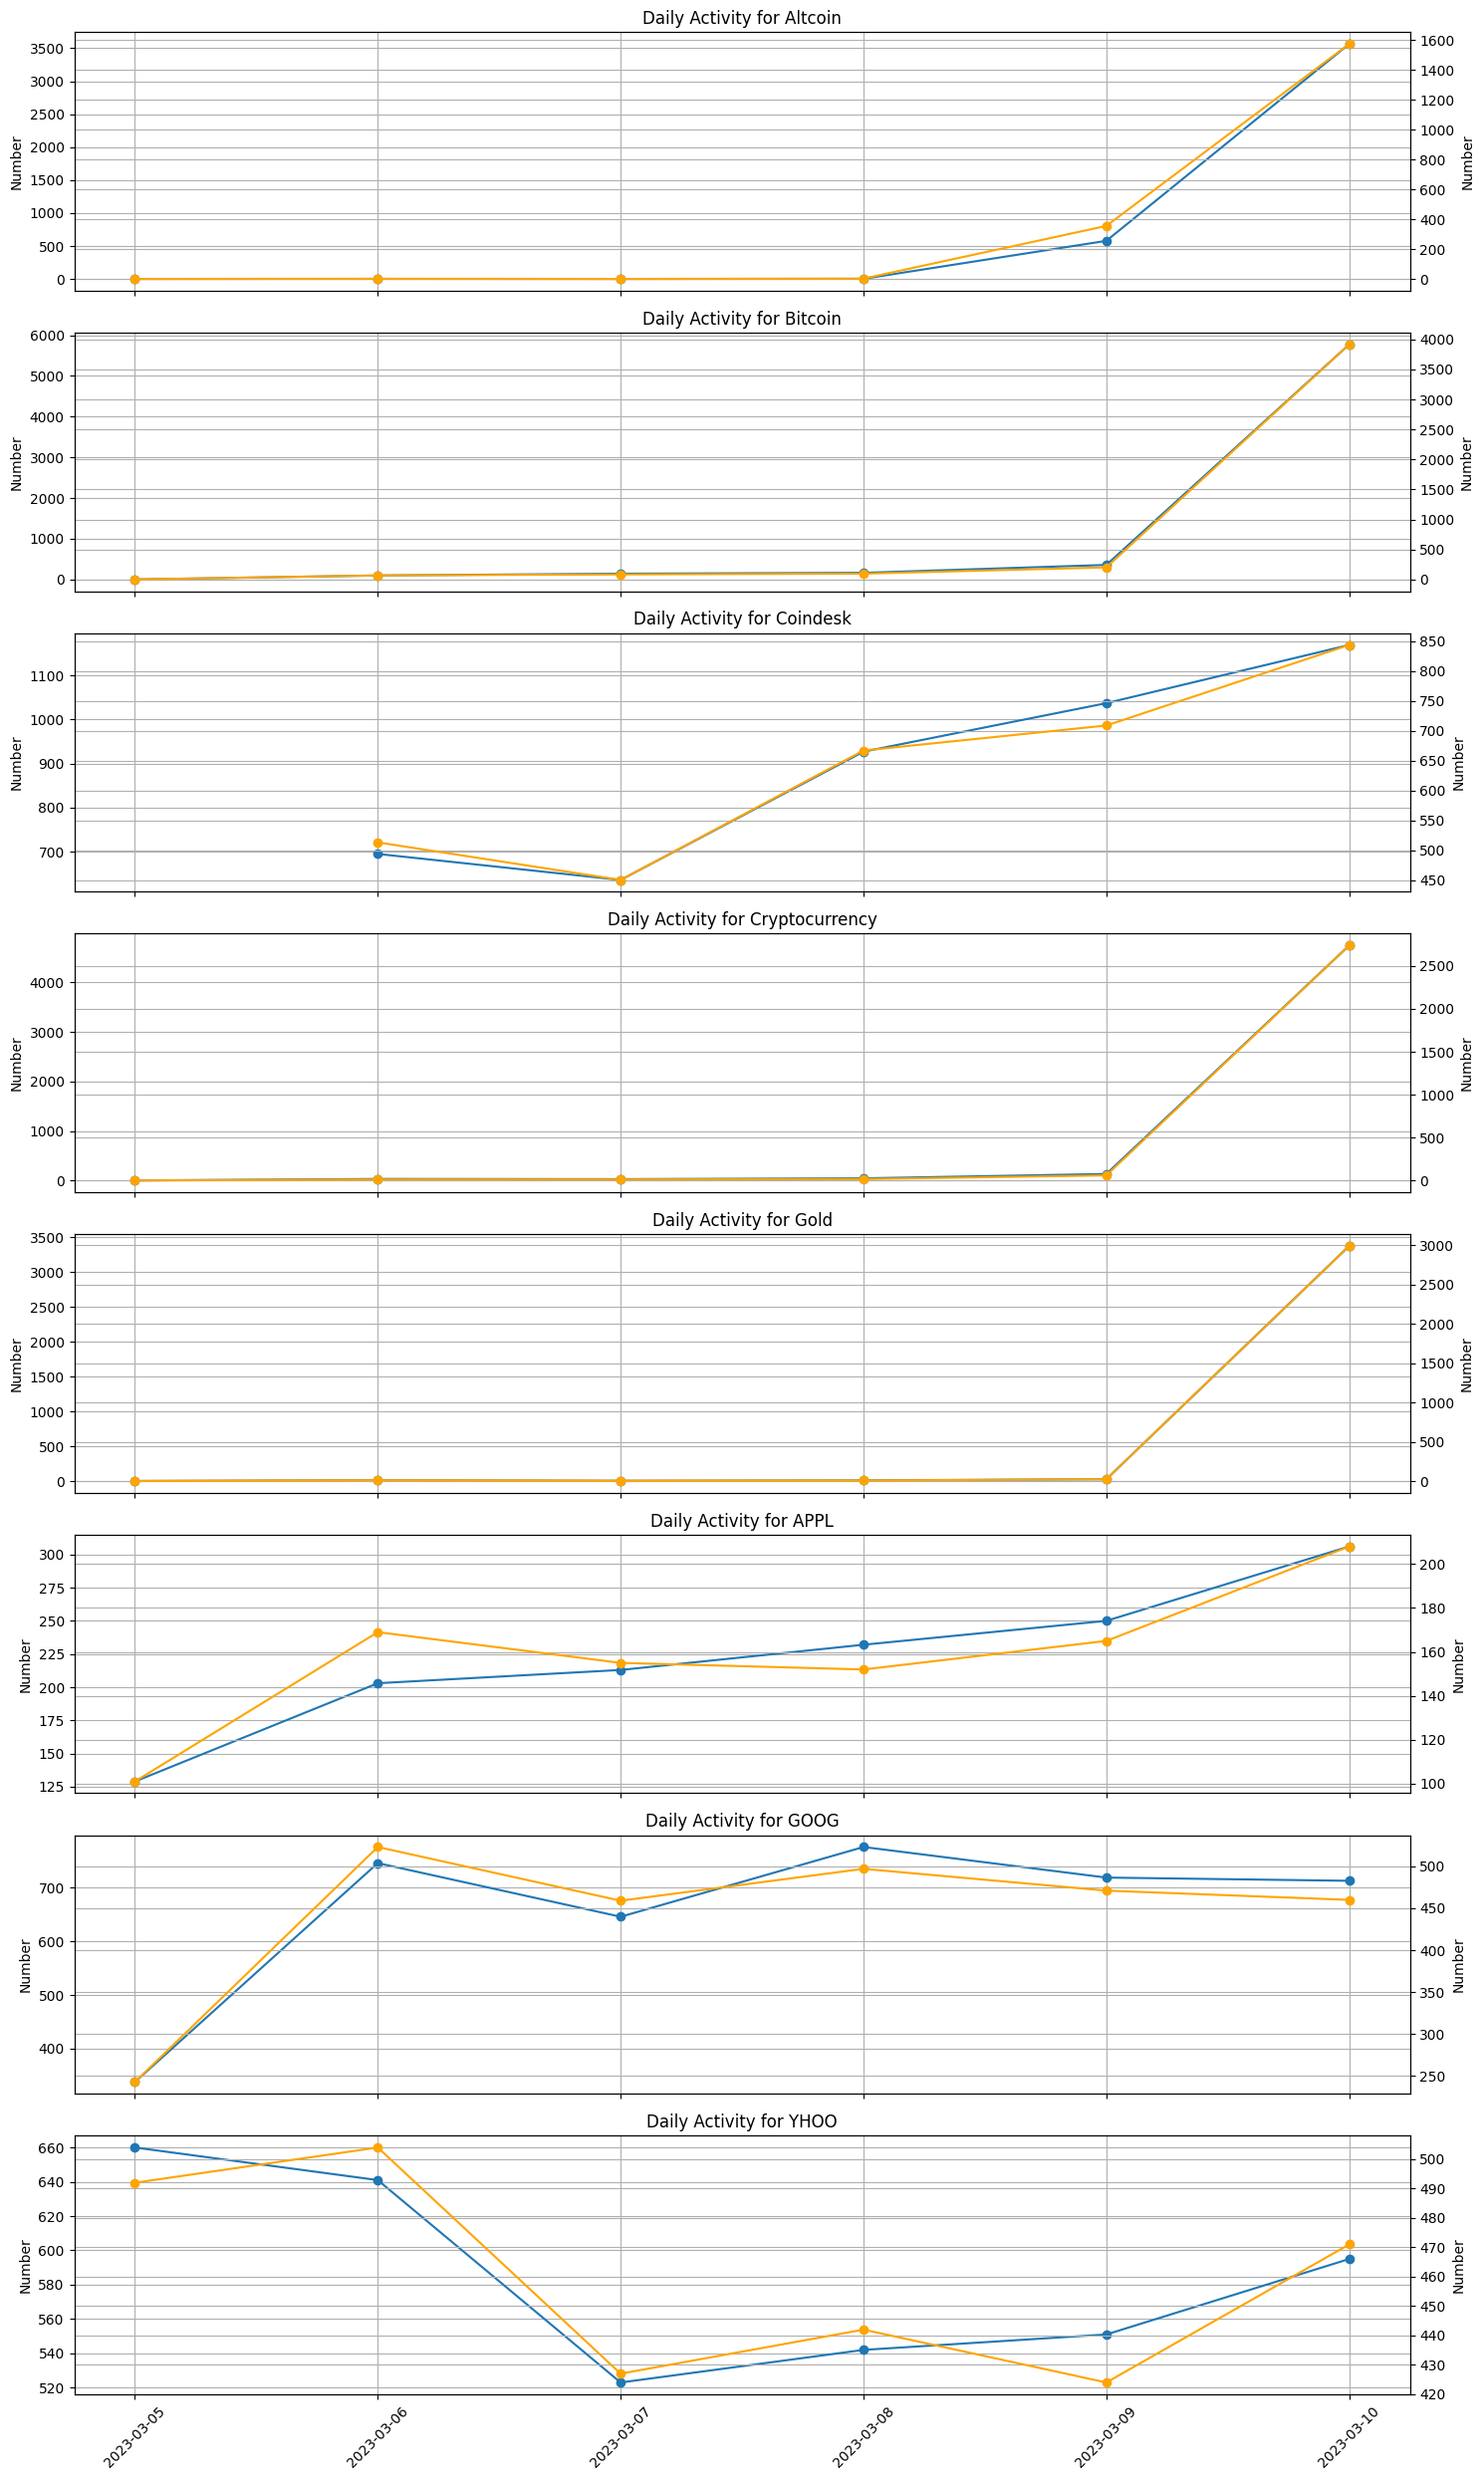

In [49]:
# Create subplots for each keyword
fig, axs = plt.subplots(len(keywords), 1, figsize=(15, 25), sharex=True)

for i, keyword in enumerate(keywords):
    keyword_data = tweeter_combined_df[tweeter_combined_df['Text'].str.contains(keyword, case=False)]

    daily_tweet_counts = keyword_data.groupby('Date').size()
    daily_user_counts = keyword_data.groupby('Date')['User'].nunique()

    # Plotting the daily number of tweets
    axs[i].plot(daily_tweet_counts.index, daily_tweet_counts.values, marker='o', linestyle='-', label='Tweets')
    axs[i].set_title(f'Daily Activity for {keyword}')
    axs[i].set_ylabel('Number')
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

    # Plotting the daily number of users
    axs2 = axs[i].twinx()
    axs2.plot(daily_user_counts.index, daily_user_counts.values, marker='o', linestyle='-', color='orange', label='Users')
    axs2.set_ylabel('Number')
    axs2.grid(True)

# fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()


# Hourly Trends of Tweets and Users

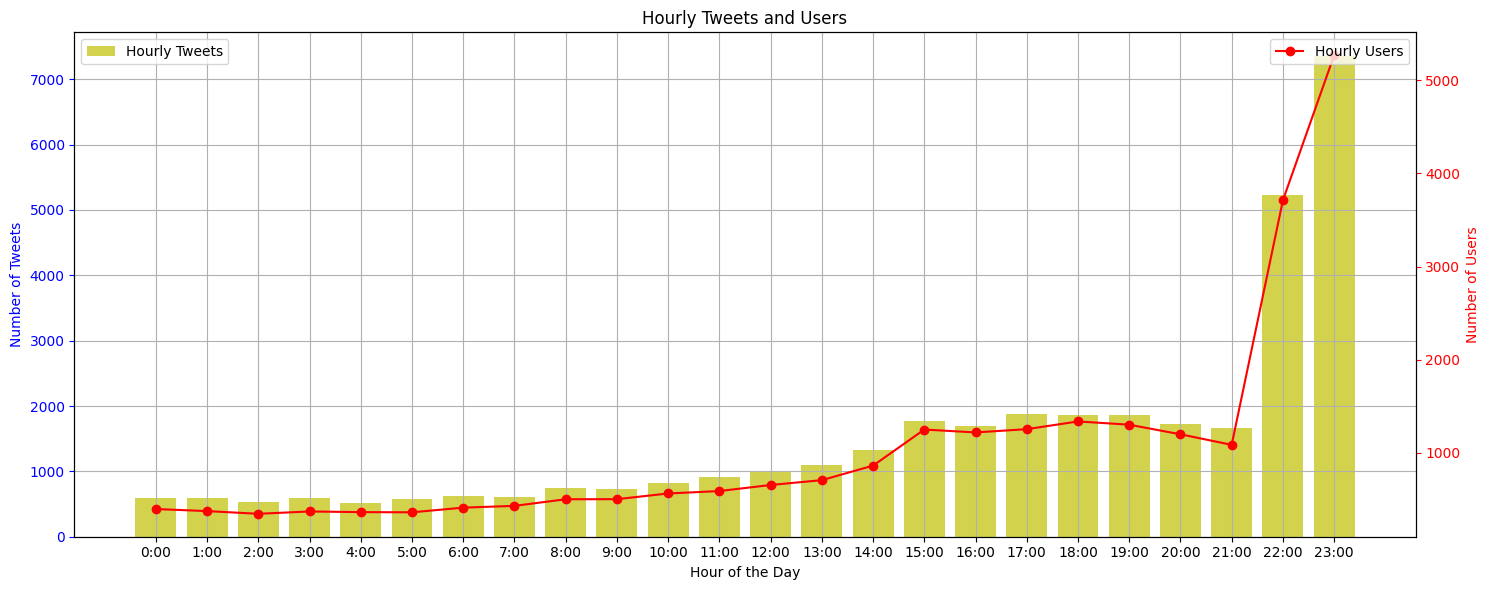

In [50]:
# Group data by hour
hourly_data = tweeter_combined_df.groupby(tweeter_combined_df['Datetime'].dt.hour).agg({'Text': 'count', 'User': 'nunique'})

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 6))

# Bar plot for hourly tweet counts
ax1.bar(hourly_data.index, hourly_data['Text'], color='y', alpha=0.7, label='Hourly Tweets')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Number of Tweets', color='b')
ax1.tick_params('y', colors='b')

# Creating a secondary y-axis for hourly user counts
ax2 = ax1.twinx()
ax2.plot(hourly_data.index, hourly_data['User'], color='r', marker='o', label='Hourly Users')
ax2.set_ylabel('Number of Users', color='r')
ax2.tick_params('y', colors='r')

# Adding legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adding gridlines
ax1.grid(True)

# Setting x-axis ticks
ax1.set_xticks(range(24))
ax1.set_xticklabels([str(i) + ':00' for i in range(24)])

plt.title('Hourly Tweets and Users')
plt.tight_layout()
plt.show()


## Daily Number of Tweets for Each Keyword as Well as the Daily Number of Users

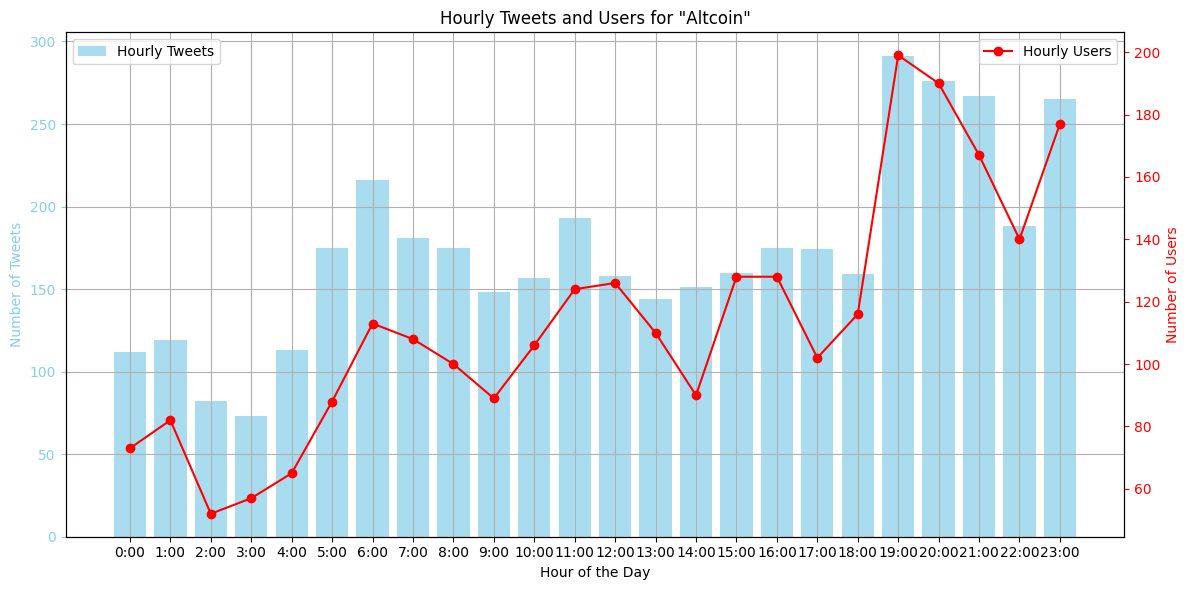

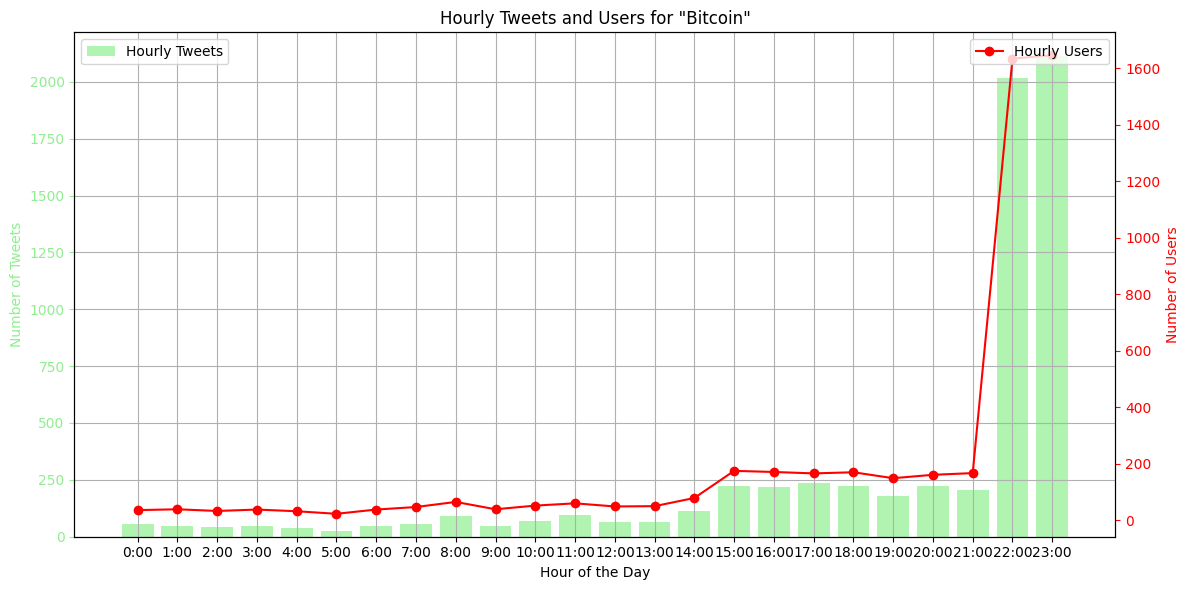

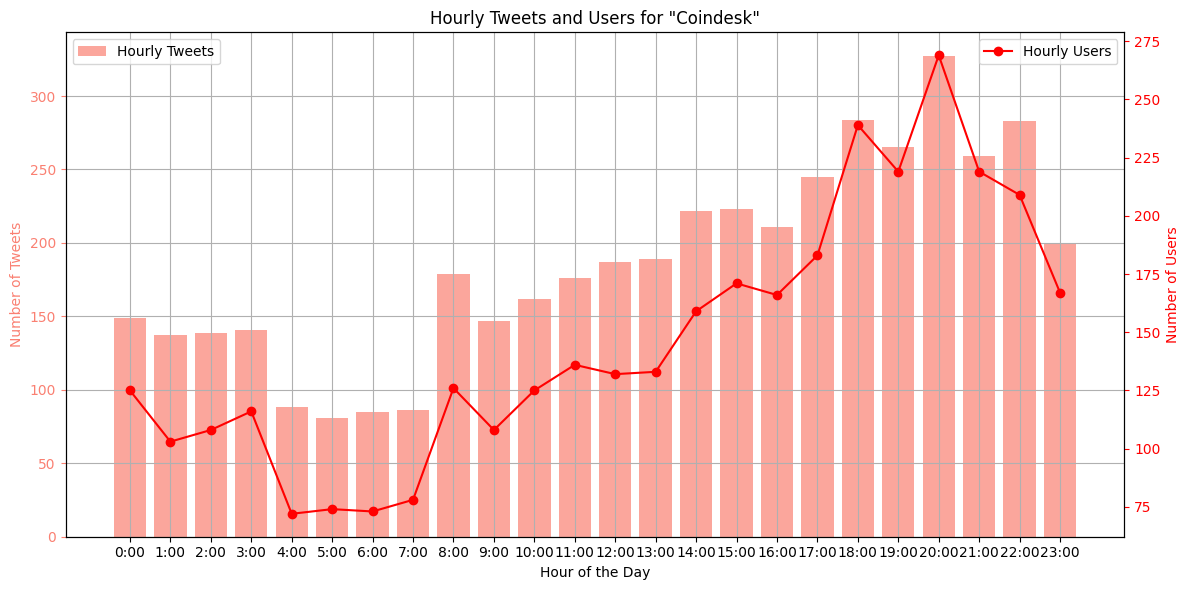

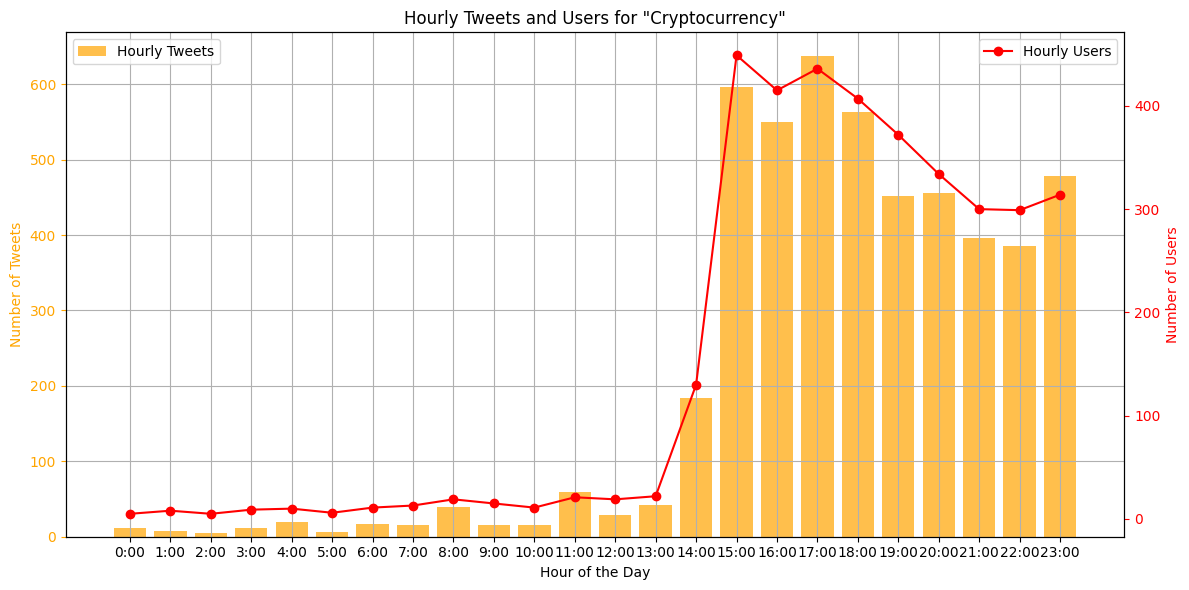

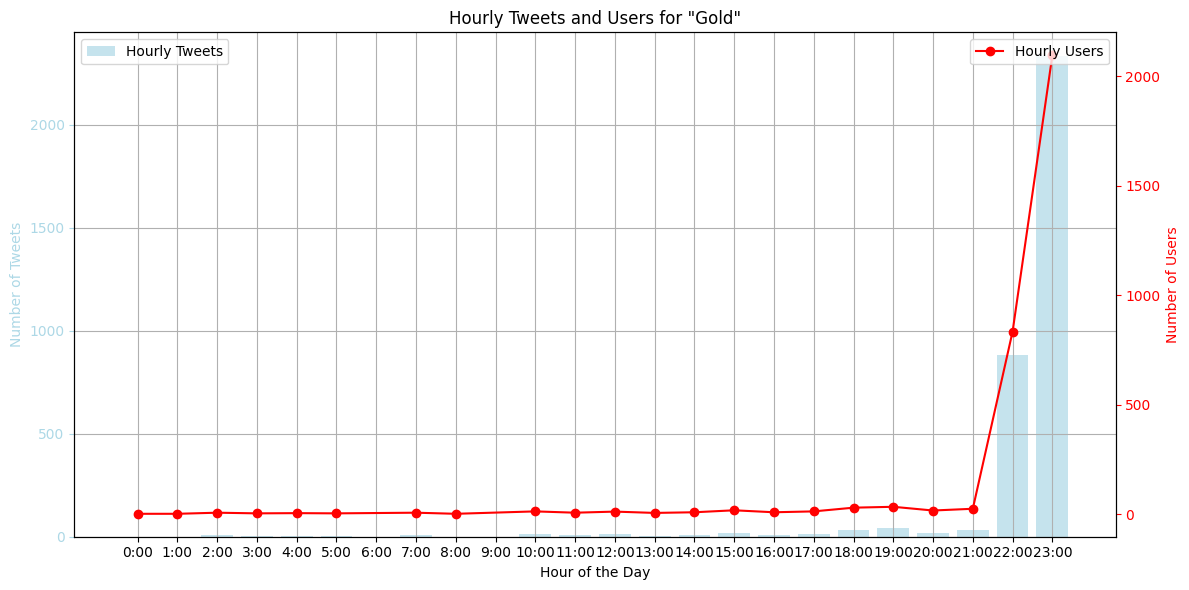

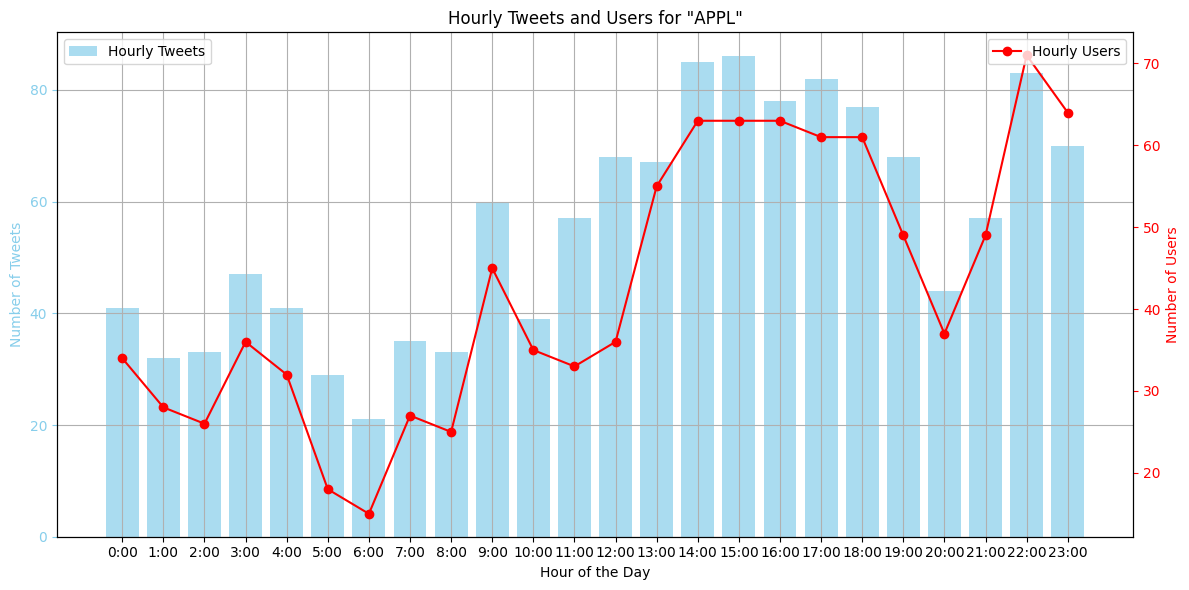

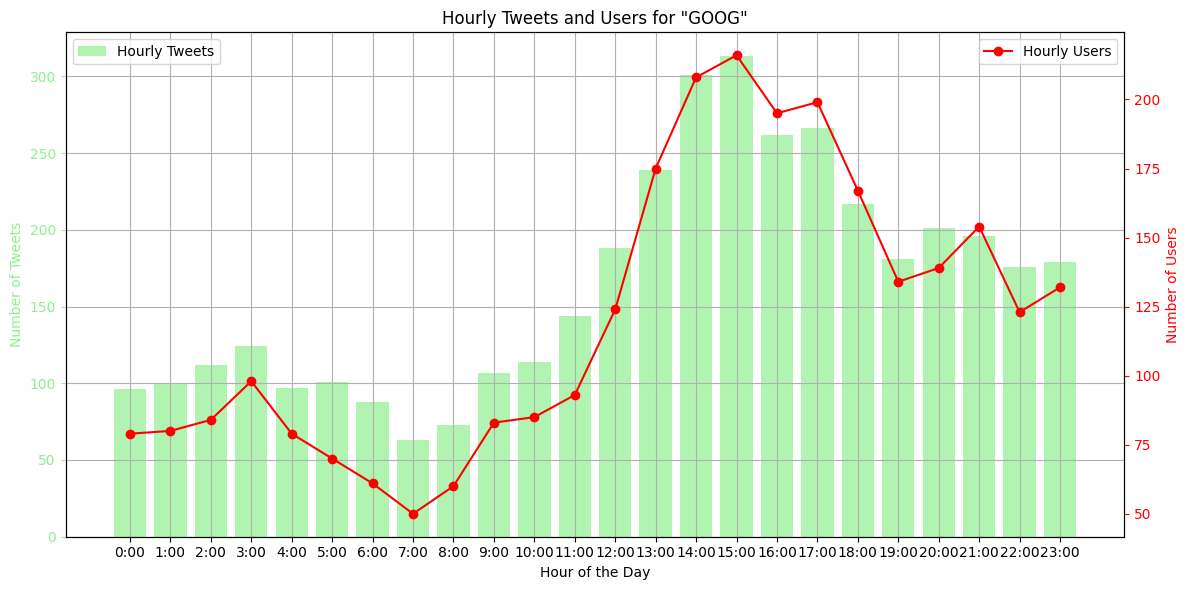

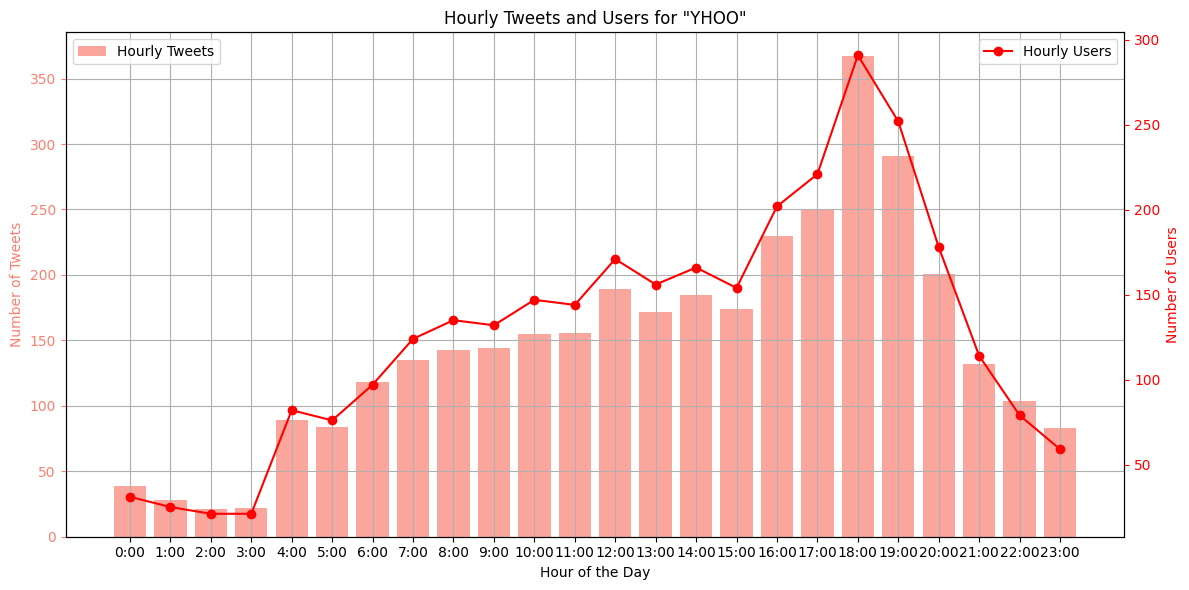

In [41]:
# Define colors for the bar plots
bar_colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightblue']

# Group data by hour for each keyword
hourly_data_by_keyword = {}
for keyword in keywords:
    keyword_data = tweeter_combined_df[tweeter_combined_df['Text'].str.contains(keyword, case=False)]
    hourly_data = keyword_data.groupby(keyword_data['Datetime'].dt.hour).agg({'Text': 'count', 'User': 'nunique'})
    hourly_data_by_keyword[keyword] = hourly_data

# Plotting for each keyword
for i, keyword in enumerate(keywords):
    hourly_data = hourly_data_by_keyword[keyword]
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Bar plot for hourly tweet counts
    ax1.bar(hourly_data.index, hourly_data['Text'], color=bar_colors[i % len(bar_colors)], alpha=0.7, label='Hourly Tweets')
    ax1.set_xlabel('Hour of the Day')
    ax1.set_ylabel('Number of Tweets', color=bar_colors[i % len(bar_colors)])
    ax1.tick_params('y', colors=bar_colors[i % len(bar_colors)])

    # Creating a secondary y-axis for hourly user counts
    ax2 = ax1.twinx()
    ax2.plot(hourly_data.index, hourly_data['User'], color='r', marker='o', label='Hourly Users')
    ax2.set_ylabel('Number of Users', color='r')
    ax2.tick_params('y', colors='r')

    # Adding legend
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Adding gridlines
    ax1.grid(True)

    # Setting x-axis ticks
    ax1.set_xticks(range(24))
    ax1.set_xticklabels([str(i) + ':00' for i in range(24)])

    plt.title(f'Hourly Tweets and Users for "{keyword}"')
    plt.tight_layout()
    plt.show()



#  Determining and visualizing the preferred topics of users based on their tweet content extracted from the DataFrame

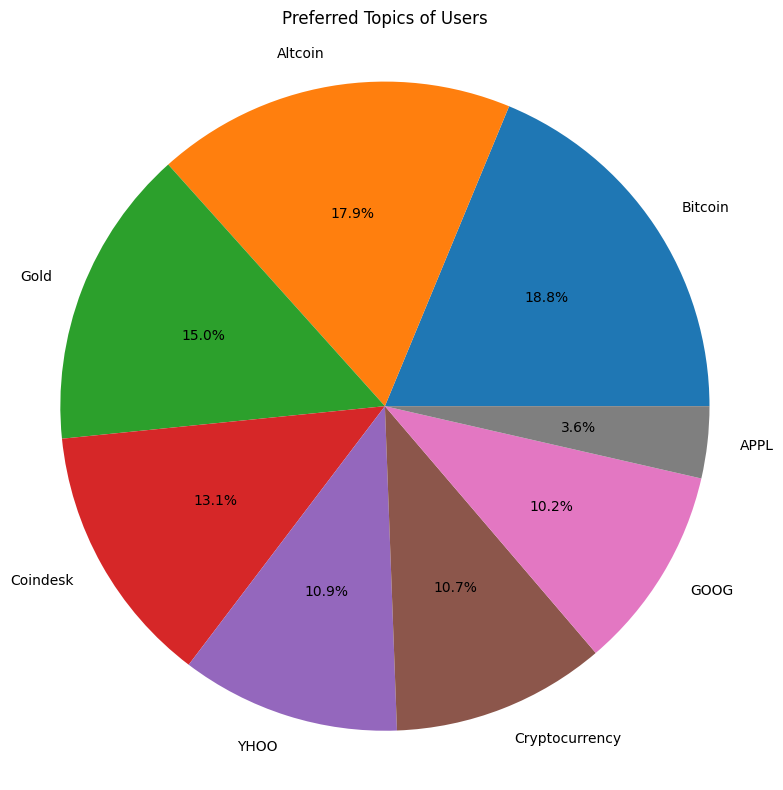

In [42]:
# Determine preferred topics for each user
topics_preferred_by = {}
for user in tweeter_combined_df['User'].unique():
    user_data = tweeter_combined_df[tweeter_combined_df['User'] == user]
    topics_used = {}
    for keyword in keywords:
        topics_used[keyword] = user_data['Text'].str.contains(keyword, case=False).sum()
        topics_preferred_by[user] = max(topics_used, key=topics_used.get)

# Plot preferred topics
plt.figure(figsize=(8, 8))
topics_preferred_by_series = pd.Series(topics_preferred_by)
topics_preferred_by_series.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Preferred Topics of Users')
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.show()


# Comaprison between Bitcoin and Gold

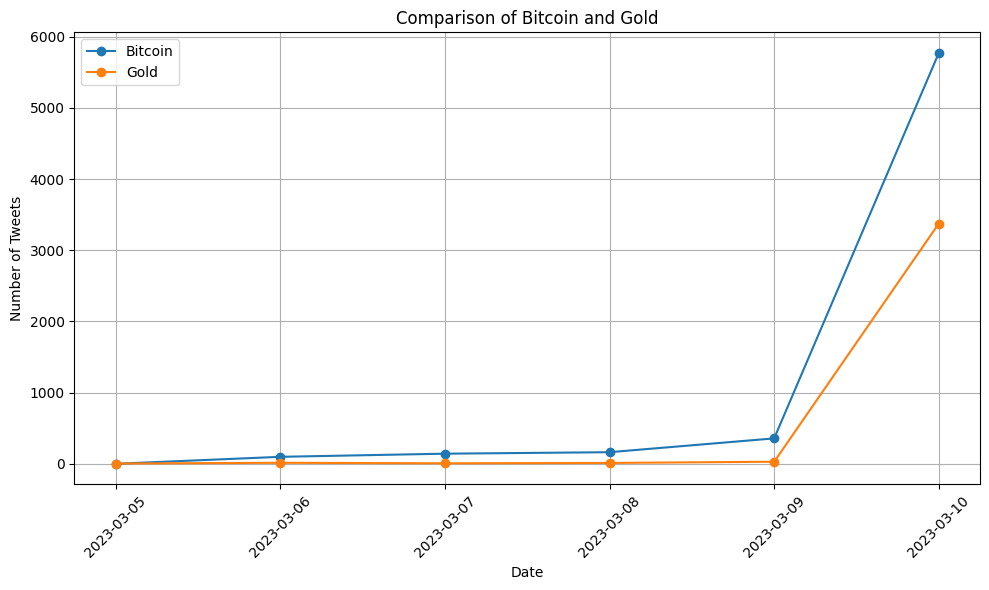

In [52]:
# Extract data for 'bitcoin' and 'gold' keywords
bitcoin_data = tweeter_combined_df[tweeter_combined_df['Text'].str.contains('bitcoin', case=False)]
gold_data = tweeter_combined_df[tweeter_combined_df['Text'].str.contains('gold', case=False)]

# Calculate daily tweet counts for bitcoin and gold
daily_tweet_counts_bitcoin = bitcoin_data.groupby('Date').size()
daily_tweet_counts_gold = gold_data.groupby('Date').size()

# Plot comparison graph for 'bitcoin' and 'gold'
plt.figure(figsize=(10, 6))
plt.plot(daily_tweet_counts_bitcoin.index, daily_tweet_counts_bitcoin.values, marker='o', linestyle='-', label='Bitcoin')
plt.plot(daily_tweet_counts_gold.index, daily_tweet_counts_gold.values, marker='o', linestyle='-', label='Gold')
plt.title('Comparison of Bitcoin and Gold')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Comparison between Most and Least used keywords

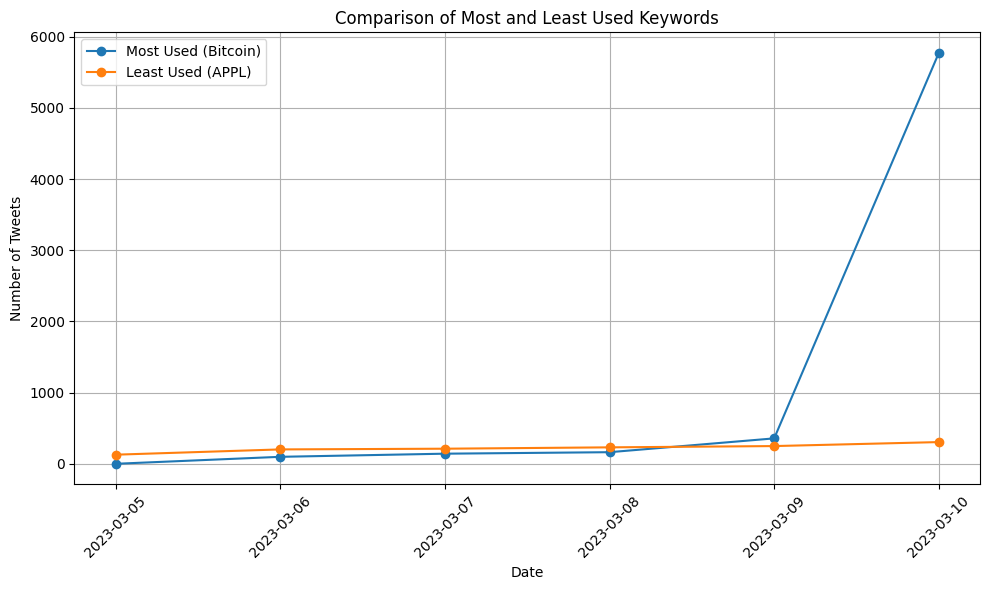

In [53]:
# Find most and least used keywords
keyword_tweet_counts = {}
for keyword in keywords:
    keyword_data = tweeter_combined_df[tweeter_combined_df['Text'].str.contains(keyword, case=False)]
    keyword_tweet_counts[keyword] = keyword_data.shape[0]

most_used_keyword = max(keyword_tweet_counts, key=keyword_tweet_counts.get)
least_used_keyword = min(keyword_tweet_counts, key=keyword_tweet_counts.get)

# Extract data for most and least used keywords
most_used_data = tweeter_combined_df[tweeter_combined_df['Text'].str.contains(most_used_keyword, case=False)]
least_used_data = tweeter_combined_df[tweeter_combined_df['Text'].str.contains(least_used_keyword, case=False)]

# Plot comparison graph for most and least used keywords
plt.figure(figsize=(10, 6))
plt.plot(most_used_data.groupby('Date').size(), marker='o', linestyle='-', label=f'Most Used ({most_used_keyword})')
plt.plot(least_used_data.groupby('Date').size(), marker='o', linestyle='-', label=f'Least Used ({least_used_keyword})')
plt.title('Comparison of Most and Least Used Keywords')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# **********The End**********8